In [ ]:
pip install nashpy

In [ ]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = "filtered_1_1_with_sw.xlsx"
df = pd.read_excel(file_path)

# Function to compute social welfare for (Defense, No Attack) and (Defense, Attack)
def compute_social_welfare(row):
    a = row['a']  # Benefit of attack
    b = row['b']  # Benefit of defense
    c = row['c']  # Cost of attack
    d = row['d']  # Cost of defense
    w = row['w']  # Asset value/Loss to defender
    v = row['v']  # Probability of successful defense

    m, n, p, s = 0, 0, 0, 0  # Constants

    # Defender Payoff Matrix
    D = np.array([
        [0, -w],                               # (No Defense, No Attack) | (No Defense, Attack)
        [-d + b, -d + v * b - w * (1 - v)],    # (Defense, No Attack)    | (Defense, Attack)
    ])

    # Attacker Payoff Matrix
    A = np.array([
        [0, -c + a - m * p],                     # (No Defense, No Attack) | (No Defense, Attack)
        [0, -c + a * (1 - v) - v * n * s - (1 - v) * m * p],  # (Defense, No Attack) | (Defense, Attack)
    ])

    # Compute total payoffs (Social Welfare)
    payoff_sums = D + A  # Element-wise sum of both matrices

    # Extract social welfare values
    dna_sw = payoff_sums[1, 0]  # (Defense, No Attack)
    da_sw = payoff_sums[1, 1]   # (Defense, Attack)

    return dna_sw, da_sw

# Apply function to each row and create new columns
df[['DNA_SW', 'DA_SW']] = df.apply(compute_social_welfare, axis=1, result_type="expand")

# Save the updated dataframe to a new Excel file
output_file = "filtered_1_1_with_sw_updated.xlsx"
df.to_excel(output_file, index=False)

print(f"Updated file saved as: {output_file}")

Updated file saved as: filtered_1_1_with_sw_updated.xlsx


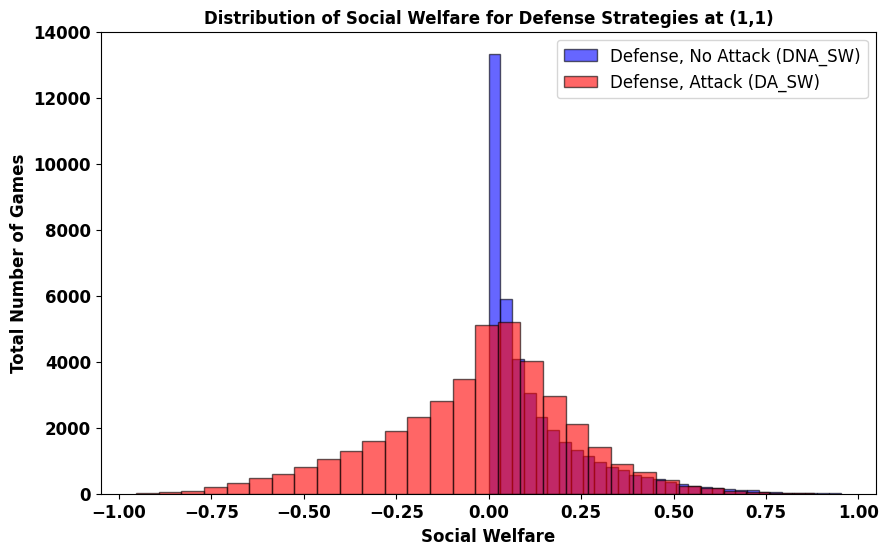

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated Excel file
file_path = "filtered_1_1_with_sw_updated.xlsx"
df = pd.read_excel(file_path)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df["DNA_SW"], bins=30, alpha=0.6, label="Defense, No Attack (DNA_SW)", color="blue", edgecolor="black")
plt.hist(df["DA_SW"], bins=30, alpha=0.6, label="Defense, Attack (DA_SW)", color="red", edgecolor="black")

# Labels and title (bold and size 12)
plt.xlabel("Social Welfare", fontsize=12, fontweight="bold")
plt.ylabel("Total Number of Games", fontsize=12, fontweight="bold")
plt.title("Distribution of Social Welfare for Defense Strategies at (1,1)", fontsize=12, fontweight="bold")

# Ticks (bold)
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.show()

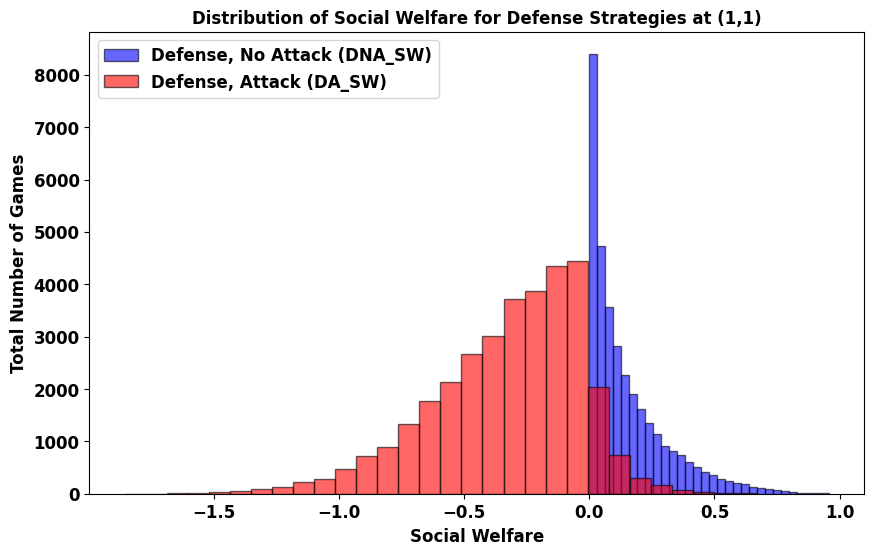

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated Excel file
file_path = "filtered_1_0_with_sw_updated.xlsx"
df = pd.read_excel(file_path)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df["DNA_SW"], bins=30, alpha=0.6, label="Defense, No Attack (DNA_SW)", color="blue", edgecolor="black")
plt.hist(df["DA_SW"], bins=30, alpha=0.6, label="Defense, Attack (DA_SW)", color="red", edgecolor="black")

# Labels and title (bold and size 12)
plt.xlabel("Social Welfare", fontsize=12, fontweight="bold")
plt.ylabel("Total Number of Games", fontsize=12, fontweight="bold")
plt.title("Distribution of Social Welfare for Defense Strategies at (1,1)", fontsize=12, fontweight="bold")

# Ticks (bold)
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.show()

In [ ]:
import nashpy as nash
import numpy as np

# Parameter values
a = 0.90  # Benefit of attack
b = 0.79  # Benefit of defense
c = 0.51  # Cost of attack
d = 0.20  # Cost of defense
w = 0.98  # Asset value/Loss to defender
v = 0.26  # Probability of successful defense

m = 0  # Probability of catching attacker in an unsecured system
n = 0  # Probability of catching attacker in a secure system
p = 0  # Fine to attacker for a successful attack
s = 0  # Fine to attacker for an unsuccessful attack

# Defender Payoff Matrix
D = np.array([
    [0, -w],                              # (No Defense, No Attack) | (No Defense, Attack)
    [-d + b, -d + v * b - w * (1 - v)],   # (Defense, No Attack)     | (Defense, Attack)
])

# Attacker Payoff Matrix
A = np.array([
    [0, -c + a - m * p],                      # (No Defense, No Attack) | (No Defense, Attack)
    [0, -c + a * (1 - v) - v * n * s - (1 - v) * m * p],  # (Defense, No Attack) | (Defense, Attack)
])

# Compute total payoffs for each strategy pair (Social Welfare)
payoff_sums = D + A  # Element-wise sum of both matrices

# Extract social welfare for the two strategy pairs
sw_defense_no_attack = payoff_sums[1, 0]  # (Defense, No Attack)
sw_defense_attack = payoff_sums[1, 1]  # (Defense, Attack)

# Determine the strategy with the highest social welfare
if sw_defense_no_attack > sw_defense_attack:
    best_strategy = "(Defense, No Attack)"
    max_sw = sw_defense_no_attack
else:
    best_strategy = "(Defense, Attack)"
    max_sw = sw_defense_attack

# Display results
print("Total Payoffs (Social Welfare) for Strategy Pairs:")
print(payoff_sums)
print(f"Social Welfare for (Defense, No Attack): {sw_defense_no_attack}")
print(f"Social Welfare for (Defense, Attack): {sw_defense_attack}")
print(f"Highest Social Welfare Strategy: {best_strategy} with Total Payoff: {max_sw}")

Total Payoffs (Social Welfare) for Strategy Pairs:
[[ 0.     -0.59  ]
 [ 0.59   -0.5638]]
Social Welfare for (Defense, No Attack): 0.5900000000000001
Social Welfare for (Defense, Attack): -0.5638
Highest Social Welfare Strategy: (Defense, No Attack) with Total Payoff: 0.5900000000000001


In [ ]:
# Find payoff matrix

import nashpy as nash
import numpy as np
import matplotlib.pyplot as plt

# Parameter values

a = 0.90 # Benefit of attack
b = 0.79 # Benefit of defence
c = 0.51 # Cost of attack
d = 0.20 # Cost of defence
w = 0.98 # Asset value/Loss to defender
v = 0.26 # probability of successfull defence

m = 0  # Probability of catching attacker of an unsecured system
n = 0  # Probability of catching attacker of a secure system
p = 0  # Fine to attacker for a successful attack
s = 0  # Fine to attacker for an unsuccessful attack

# Defender Payoff matrix
D = np.array([
        [ 0, -w],
        [ -d + b, -d + v * b - w * (1 - v)],
    ])

game1 = nash.Game(D)

# Attacker Payoff matrix
A = np.array([
        [ 0, -c+a - m * p],
        [ 0, -c+a*(1-v) - v *n * s - (1-v )*m * p],
    ])

game2 = nash.Game(A)

prisoners_dilemma = nash.Game(D, A)
prisoners_dilemma

Bi matrix game with payoff matrices:

Row player:
[[ 0.     -0.98  ]
 [ 0.59   -0.7198]]

Column player:
[[0.    0.39 ]
 [0.    0.156]]

In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("/content/eq_status.xlsx")

# Define the columns to sum
total_columns = ["(0,0)", "(0,1)", "(1,0)", "(1,1)"]

# Add the 'total' column
df["total"] = df[total_columns].sum(axis=1)

# Save to a new Excel file
df.to_excel("count_eq.xlsx", index=False)

print("File 'count_eq.xlsx' has been created successfully.")


File 'count_eq.xlsx' has been created successfully.


In [ ]:
import pandas as pd

def filter_and_save_equilibria(file_path):
    # Load the Excel file
    df = pd.read_excel(file_path)

    # Columns to keep
    base_columns = ['a', 'b', 'c', 'd', 'w', 'v']
    eq_points = ['(0,1)', '(1,0)', '(1,1)','Internal_eq' ]

    # Iterate over equilibrium points and save separate files
    for eq in eq_points:
        if eq in df.columns:
            # Filter where the equilibrium point is 1
            df_filtered = df[df[eq] == 1]

            # Keep only the required columns
            df_filtered = df_filtered[base_columns + [eq]]

            # Save to a new Excel file
            output_filename = f"filtered_{eq.replace(',', '_').replace('(', '').replace(')', '')}.xlsx"
            df_filtered.to_excel(output_filename, index=False)
            print(f"Saved: {output_filename}")
        else:
            print(f"Column {eq} not found in file.")

# Example usage (modify path accordingly)
file_path = "/content/eq_status_with_internal_stability.xlsx"
filter_and_save_equilibria(file_path)

Saved: filtered_0_1.xlsx
Saved: filtered_1_0.xlsx
Saved: filtered_1_1.xlsx
Saved: filtered_Internal_eq.xlsx


In [ ]:
# prompt: code to filter the rows in this excel file "eq_status" when (1,0) and (0,1) are 1 simultaneously and all other columns are 0.

import pandas as pd

def filter_rows(file_path):
    """
    Filters rows in an Excel file based on specific criteria.

    Args:
        file_path: The path to the Excel file.
    """
    try:
        df = pd.read_excel(file_path)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return

    # Check if necessary columns exist
    required_cols = ['(1,0)', '(0,1)', '(0,0)', '(1,1)','a', 'b', 'c', 'd', 'w', 'v']
    if not all(col in df.columns for col in required_cols):
        print("Error: The Excel file must contain columns '(1,0)', '(0,1)', '(0,0)', '(1,1)','a', 'b', 'c', 'd', 'w', 'v'")
        return

    # Filter rows
    filtered_df = df[
        (df['(1,0)'] == 1) & (df['(0,1)'] == 1) &
        (df['(0,0)'] == 0) & (df['(1,1)'] == 0)
    ]

    # Save filtered data to a new Excel file
    output_file = "filtered_eq_status.xlsx"
    filtered_df.to_excel(output_file, index=False)
    print(f"Filtered data saved to {output_file}")


# Example usage:
file_path = "/content/eq_status.xlsx"  # Replace with your file path
filter_rows(file_path)


Filtered data saved to filtered_eq_status.xlsx


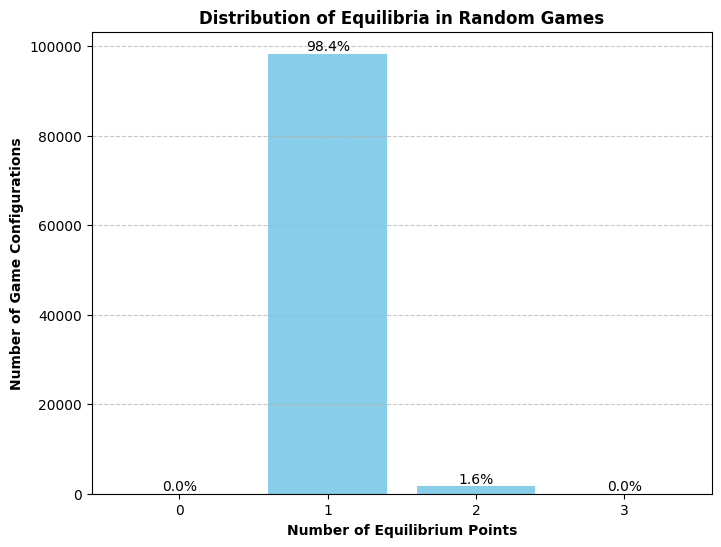

In [ ]:
# prompt: use this file "/content/Random_games_mfull2.xlsx" and its column total_eq has the total number of equilibria in each random game. now plot a bar plot to show the stable equilibria for 0,1,2,3 points by counting each of them. and show the percentage of each equilibria on top of each bar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "/content/count_eq.xlsx"  # Adjust if needed
df = pd.read_excel(file_path)

# Count occurrences of 0, 1, 2, and 3 equilibria
equilibria_counts = df['total'].value_counts().reindex([0, 1, 2, 3], fill_value=0)

# Calculate percentages
total_games = len(df)
percentages = (equilibria_counts / total_games) * 100

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(equilibria_counts.index, equilibria_counts.values, color='skyblue')
plt.xlabel("Number of Equilibrium Points", weight='bold')
plt.ylabel("Number of Game Configurations", weight='bold')
plt.title("Distribution of Equilibria in Random Games", weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on top of each bar
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5 ,f'{percentage:.1f}%', ha='center', va='bottom')

plt.xticks([0, 1, 2, 3])  # Ensure ticks are at 0, 1, 2, 3
plt.show()

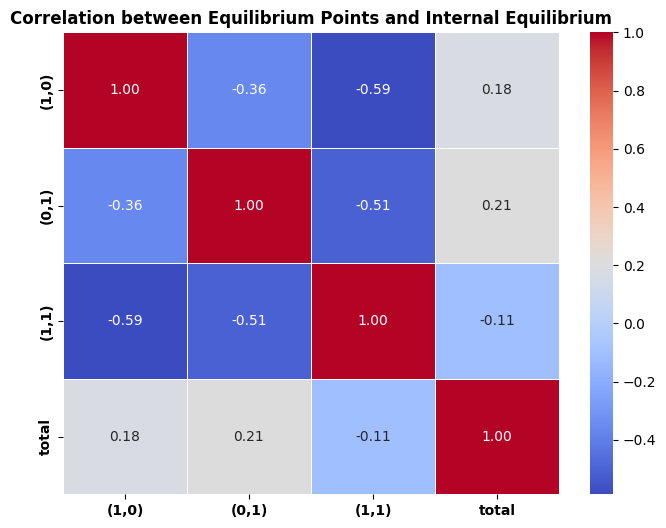

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file into a pandas DataFrame
try:
    df = pd.read_excel('/content/count_eq.xlsx')
except FileNotFoundError:
    print("Error: File not found. Please make sure the file path is correct.")
    exit()
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    exit()

# Select relevant columns for correlation analysis
columns_for_correlation = ['(1,0)', '(0,1)', '(1,1)', 'total']
correlation_data = df[columns_for_correlation]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation between Equilibrium Points and Internal Equilibrium", fontweight='bold')

# Access the axes object
ax = plt.gca()

# Iterate through the axes labels and set them to bold
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontweight('bold')

plt.show()

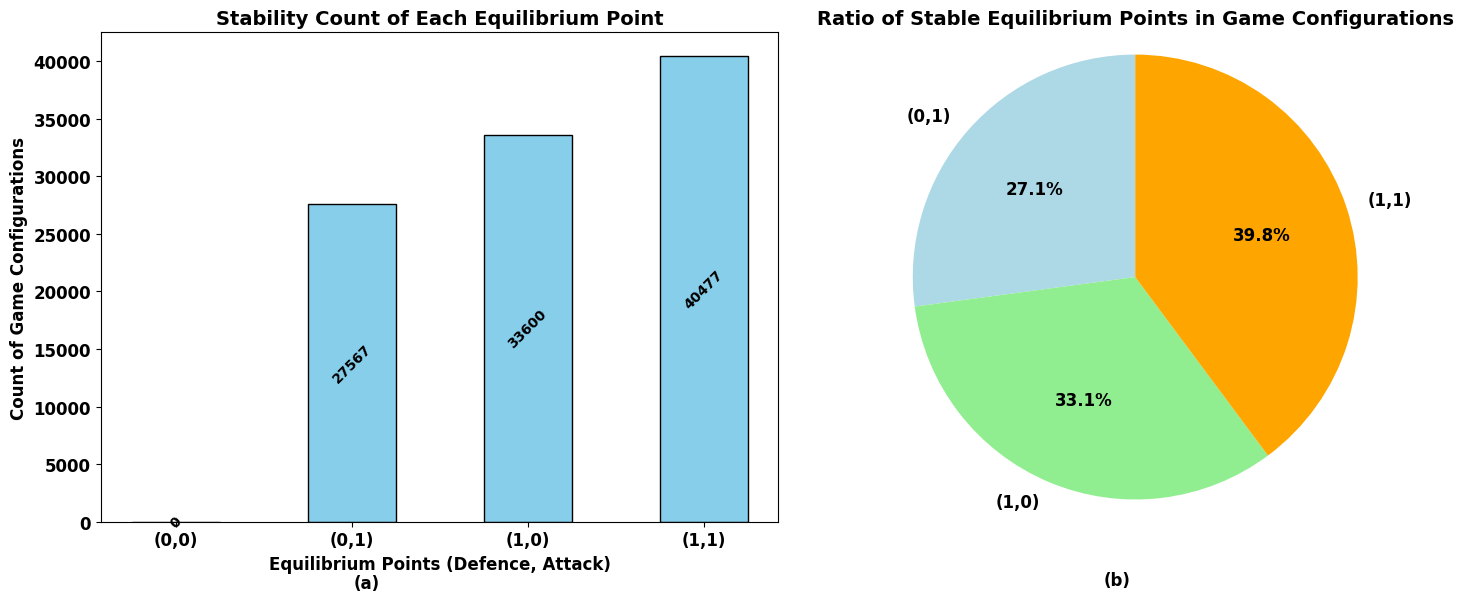

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('/content/eq_status.xlsx')

# Calculate the number of stable configurations for each equilibrium point
equilibrium_counts = df[['(0,0)', '(0,1)', '(1,0)', '(1,1)']].sum()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot (subplot 1)
bars = ax1.bar(equilibrium_counts.index, equilibrium_counts.values, width=0.5, color='skyblue', edgecolor='black')

# Add count labels on top of each bar diagonally
for bar, count in zip(bars, equilibrium_counts.values):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, str(int(count)),
             ha='center', va='center', rotation=45, color='black', fontsize=10, weight='bold')


# Bar plot settings
ax1.set_xlabel('Equilibrium Points (Defence, Attack)', fontsize=12, weight='bold')
ax1.set_ylabel('Count of Game Configurations', fontsize=12, weight='bold')
ax1.set_title('Stability Count of Each Equilibrium Point', fontsize=14, weight='bold')
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

# Pie plot (subplot 2)
equilibrium_counts_pie = df[['(0,1)', '(1,0)', '(1,1)']].sum()
ax2.pie(
    equilibrium_counts_pie,
    labels=equilibrium_counts_pie.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'lightgreen', 'orange', 'salmon']
)
ax2.set_title('Ratio of Stable Equilibrium Points in Game Configurations', fontsize=14, weight='bold')
ax2.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle

# Add subplot annotations
fig.text(0.25, 0.005, '(a)', ha='center', fontsize=12)  # Adjust coordinates and fontsize as needed
fig.text(0.75, 0.01, '(b)', ha='center', fontsize=12)  # Adjust coordinates and fontsize as needed

# Apply general font size and weight
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-3-97e67a0b3edb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defense['v_rounded'] = df_defense['v'].round(1)
<ipython-input-3-97e67a0b3edb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attack['v_rounded'] = df_attack['v'].round(1)
<ipython-input-3-97e67a0b3edb>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

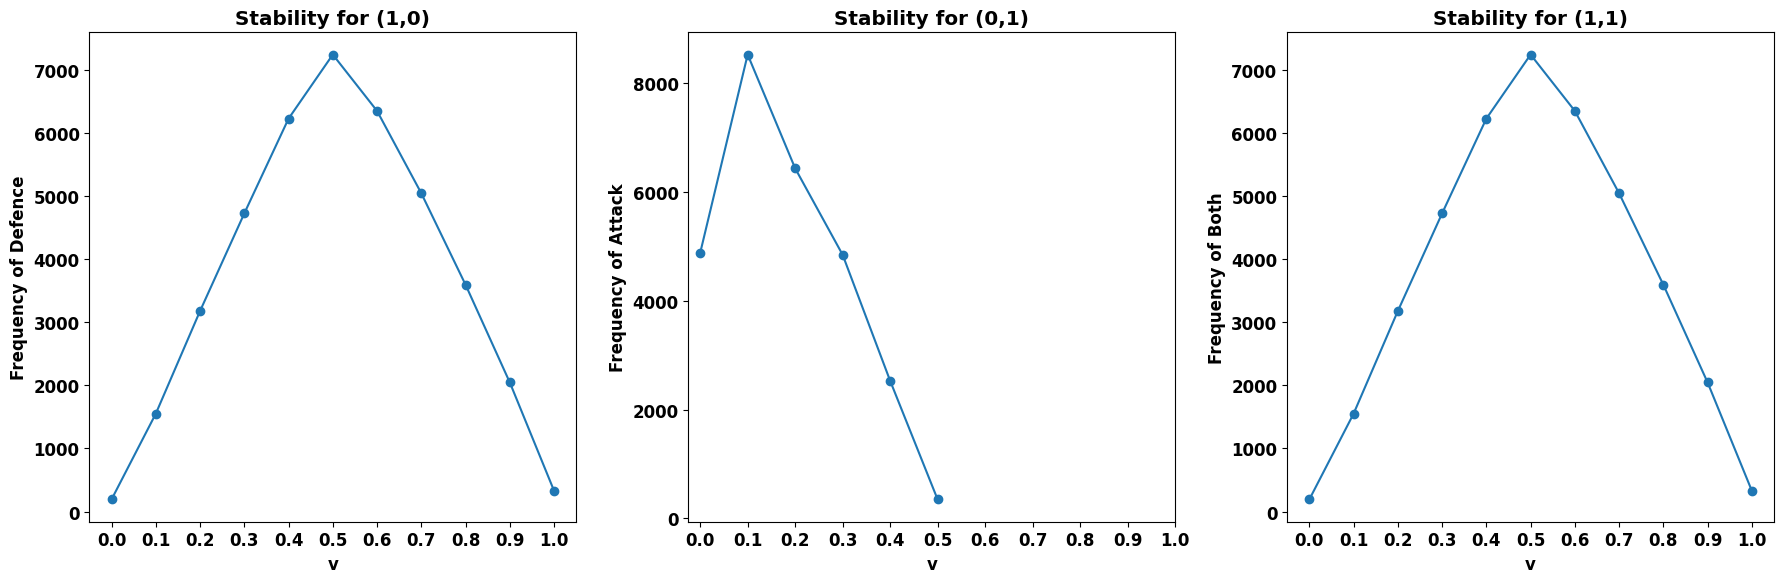

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('/content/eq_status.xlsx')

# Filter data for (1,0) == 1
df_defense = df[df['(1,1)'] == 1]

# Round the 'v' values
df_defense['v_rounded'] = df_defense['v'].round(1)

# Group by rounded 'v' values and count the occurrences of (1,0) == 1
defense_counts = df_defense.groupby('v_rounded')['(1,0)'].count()

# Filter data for (0,1) == 1
df_attack = df[df['(0,1)'] == 1]

# Round the 'v' values
df_attack['v_rounded'] = df_attack['v'].round(1)

# Group by rounded 'v' values and count the occurrences of (0,1) == 1
attack_counts = df_attack.groupby('v_rounded')['(0,1)'].count()

# Filter data for (1,1) == 1
df_both = df[df['(1,1)'] == 1]

# Round the 'v' values
df_both['v_rounded'] = df_both['v'].round(1)

# Group by rounded 'v' values and count the occurrences of (1,1) == 1
both_counts = df_both.groupby('v_rounded')['(1,1)'].count()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for defense
axes[0].plot(defense_counts.index, defense_counts.values, marker='o', linestyle='-')
axes[0].set_xlabel('v', fontsize=12, weight='bold')
axes[0].set_ylabel('Frequency of Defence', fontsize=12, weight='bold')
axes[0].set_title('Stability for (1,0)', weight='bold')
axes[0].set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# Plot for attack
axes[1].plot(attack_counts.index, attack_counts.values, marker='o', linestyle='-')
axes[1].set_xlabel('v', fontsize=12, weight='bold')
axes[1].set_ylabel('Frequency of Attack', fontsize=12, weight='bold')
axes[1].set_title('Stability for (0,1)', weight='bold')
axes[1].set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# Plot for both
axes[2].plot(both_counts.index, both_counts.values, marker='o', linestyle='-')
axes[2].set_xlabel('v', fontsize=12, weight='bold')
axes[2].set_ylabel('Frequency of Both', fontsize=12, weight='bold')
axes[2].set_title('Stability for (1,1)', weight='bold')
axes[2].set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])


plt.tight_layout()
plt.show()


<ipython-input-4-f39dc17dc751>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defense[f'{param}_rounded'] = df_defense[param].round(1)
<ipython-input-4-f39dc17dc751>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defense[f'{param}_rounded'] = df_defense[param].round(1)


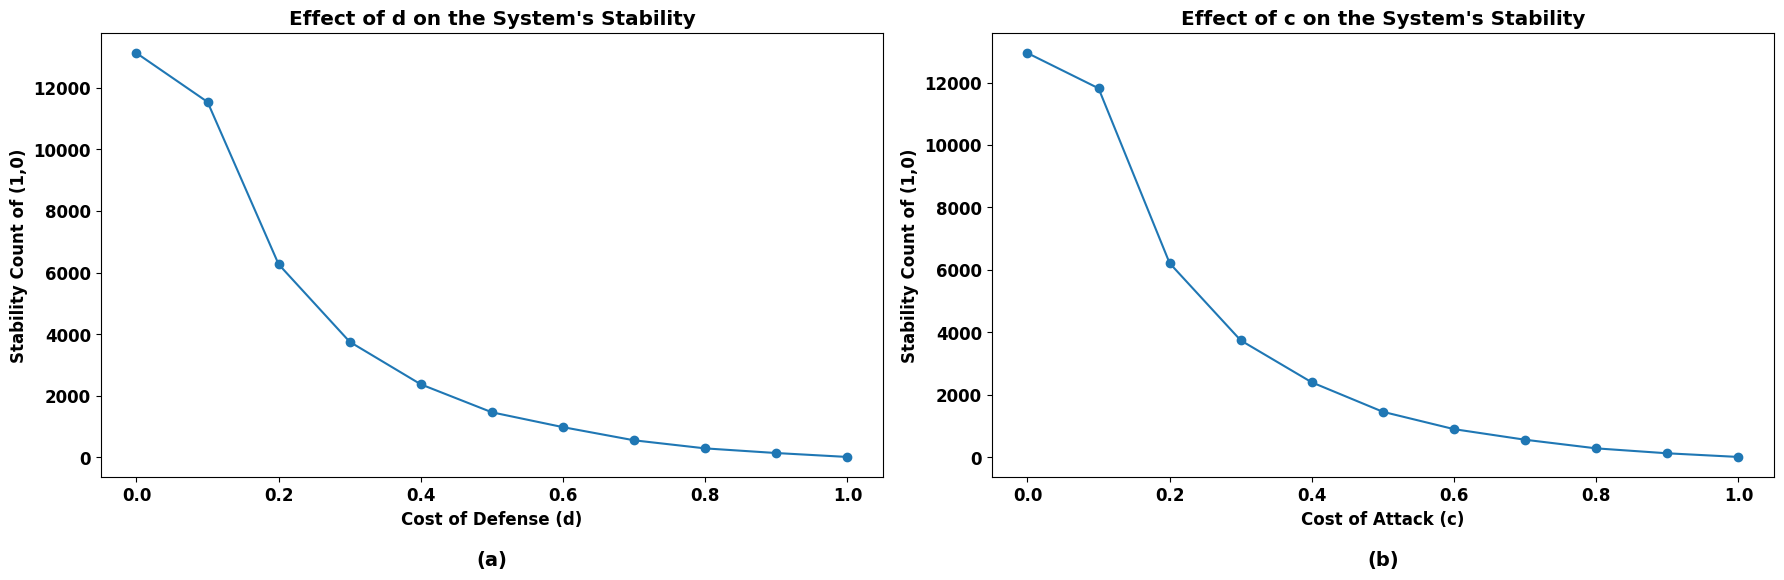

In [ ]:
# Parameters effect on System's stability

import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('/content/eq_status.xlsx')

# Filter data for (1,1) == 1
df_defense = df[df['(1,1)'] == 1]

parameters = ['d', 'c']
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

for i, param in enumerate(parameters):
    df_defense[f'{param}_rounded'] = df_defense[param].round(1)
    param_counts = df_defense.groupby(f'{param}_rounded')['(1,0)'].count()

    axes[i].plot(param_counts.index, param_counts.values, marker='o', linestyle='-')

    # Set axis labels and title with specific parameter name
    if param == 'd':
        axes[i].set_xlabel('Cost of Defense (d)', weight='bold')
    elif param == 'c':
        axes[i].set_xlabel('Cost of Attack (c)', weight='bold')

    axes[i].set_ylabel('Stability Count of (1,0)', weight='bold')
    axes[i].set_title(f"Effect of {param} on the System's Stability", weight='bold')
    #axes[i].set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# Add subplot labels
subplot_labels = ['(a)', '(b)']
for ax, label in zip(axes, subplot_labels):
    ax.text(0.5, -0.2, label, transform=ax.transAxes,
            fontsize=14, fontweight='bold', ha='center')

plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'
plt.tight_layout()
plt.show()

<ipython-input-3-2bc2566a55d7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defense[f'{param}_rounded'] = df_defense[param].round(1)
<ipython-input-3-2bc2566a55d7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defense[f'{param}_rounded'] = df_defense[param].round(1)


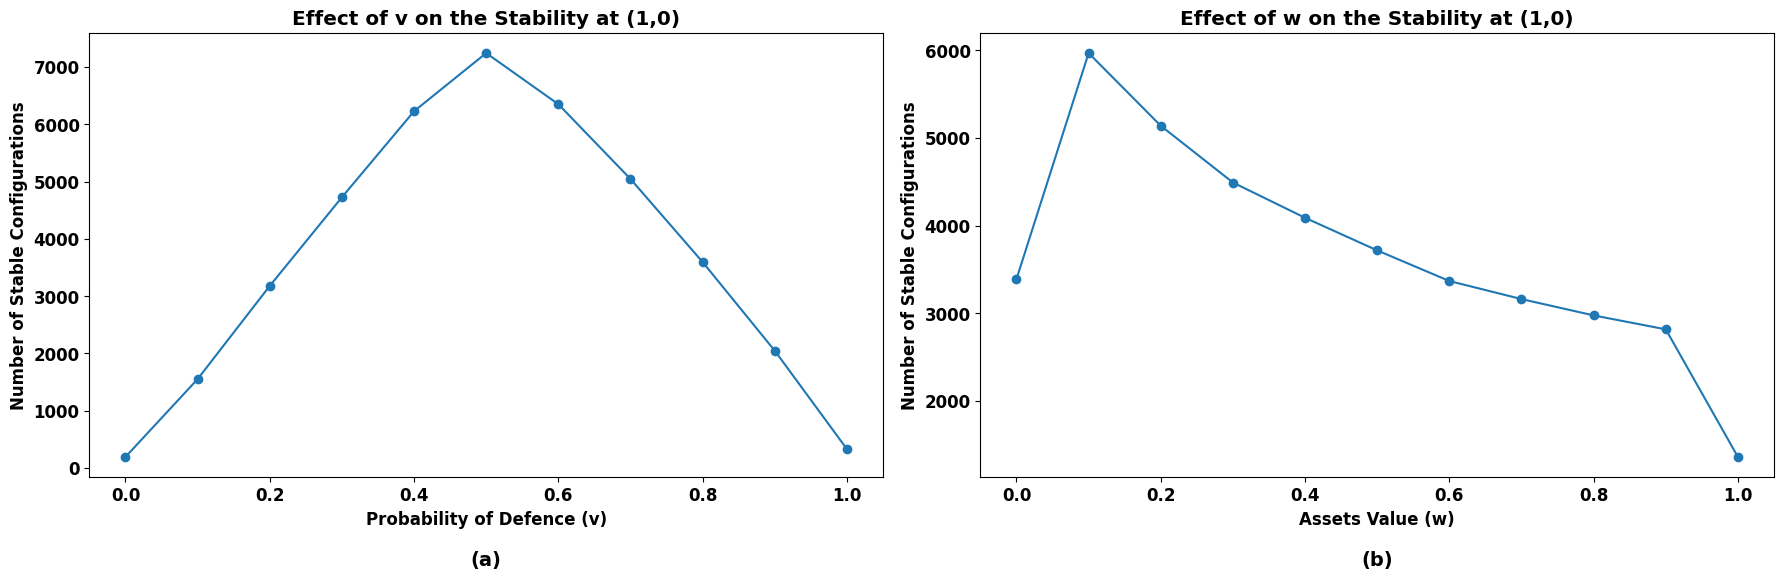

In [ ]:
# Parameters effect on System's stability

import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('/content/eq_status.xlsx')

# Filter data for (1,1) == 1
df_defense = df[df['(1,1)'] == 1]

parameters = ['v', 'w']
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

for i, param in enumerate(parameters):
    df_defense[f'{param}_rounded'] = df_defense[param].round(1)
    param_counts = df_defense.groupby(f'{param}_rounded')['(1,0)'].count()

    axes[i].plot(param_counts.index, param_counts.values, marker='o', linestyle='-')

    # Set axis labels and title with specific parameter name
    if param == 'v':
        axes[i].set_xlabel('Probability of Defence (v)', weight='bold')
    elif param == 'w':
        axes[i].set_xlabel('Assets Value (w)', weight='bold')

    axes[i].set_ylabel('Number of Stable Configurations', weight='bold')
    axes[i].set_title(f"Effect of {param} on the Stability at (1,0)", weight='bold')
    #axes[i].set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# Add subplot labels
subplot_labels = ['(a)', '(b)']
for ax, label in zip(axes, subplot_labels):
    ax.text(0.5, -0.2, label, transform=ax.transAxes,
            fontsize=14, fontweight='bold', ha='center')

plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'
plt.tight_layout()
plt.show()

<ipython-input-2-b4148c7ab537>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defense[f'{param}_rounded'] = df_defense[param].round(1)
<ipython-input-2-b4148c7ab537>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defense[f'{param}_rounded'] = df_defense[param].round(1)


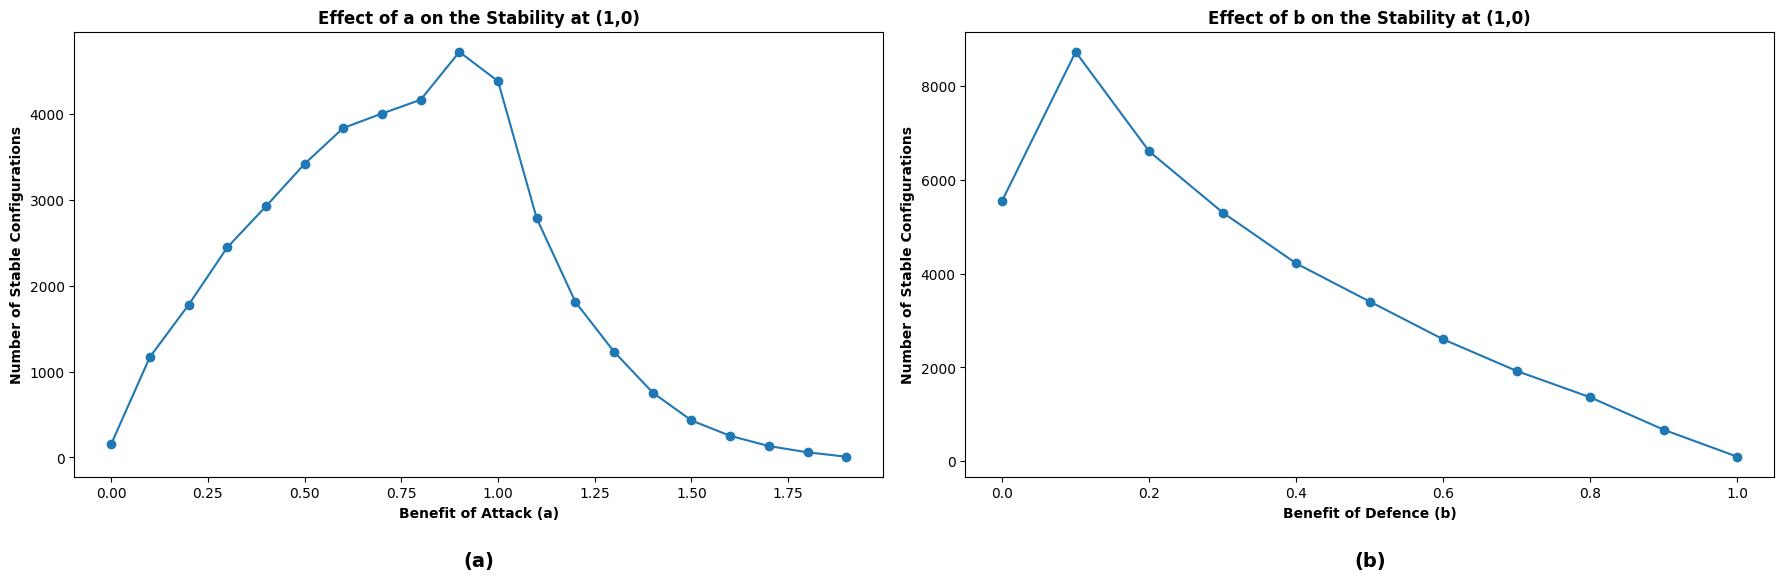

In [ ]:
# Parameters effect on System's stability

import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('/content/eq_status.xlsx')

# Filter data for (1,1) == 1
df_defense = df[df['(1,1)'] == 1]

parameters = ['a', 'b']
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

for i, param in enumerate(parameters):
    df_defense[f'{param}_rounded'] = df_defense[param].round(1)
    param_counts = df_defense.groupby(f'{param}_rounded')['(1,0)'].count()

    axes[i].plot(param_counts.index, param_counts.values, marker='o', linestyle='-')

    # Set axis labels and title with specific parameter name
    if param == 'a':
        axes[i].set_xlabel('Benefit of Attack (a)', weight='bold')
    elif param == 'b':
        axes[i].set_xlabel('Benefit of Defence (b)', weight='bold')

    axes[i].set_ylabel('Number of Stable Configurations', weight='bold')
    axes[i].set_title(f"Effect of {param} on the Stability at (1,0)", weight='bold')
    #axes[i].set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

# Add subplot labels
subplot_labels = ['(a)', '(b)', '(c)']
for ax, label in zip(axes, subplot_labels):
    ax.text(0.5, -0.2, label, transform=ax.transAxes,
            fontsize=14, fontweight='bold', ha='center')

plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'
plt.tight_layout()
plt.show()